<a href="https://colab.research.google.com/github/Hengameh1392/Health/blob/main/Hengameh-Hadian-Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [1]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 6.8 MB/s 
     |████████████████████████████████| 56 kB 2.9 MB/s 
     |████████████████████████████████| 167 kB 22.5 MB/s 
     |████████████████████████████████| 1.7 MB 52.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.0 MB 42.7 MB/s 
     |████████████████████████████████| 141 kB 61.2 MB/s 
     |████████████████████████████████| 16.5 MB 46.3 MB/s 
     |████████████████████████████████| 1.3 MB 59.7 MB/s 
     |████████████████████████████████| 662 kB 52.6 MB/s 
     |████████████████████████████████| 2.0 MB 38.1 MB/s 
     |████████████████████████████████| 325 kB 52.1 MB/s 
     |████████████████████████████████| 6.8 MB 45.6 MB/s 
     |████████████████████████████████

In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [4]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Hengameh1392/Health/main/applerevenue%2011.csv')
df.head(25)

date     open     high      low    close  Close-Open     volume  \
0     2,1,2019  37.4340  38.3910  37.2745  38.1663      0.7323  148158948   
1     3,1,2019  34.7972  35.2178  34.3187  34.3646     -0.4326  365248780   
2     4,1,2019  34.9302  35.9017  34.7537  35.8316      0.9014  234428280   
3     7,1,2019  35.9380  35.9694  35.2613  35.7519     -0.1861  219111056   
4     8,1,2019  36.1458  36.6920  35.8945  36.4334      0.2876  164101256   
5     9,1,2019  36.5639  37.3470  36.1627  37.0521      0.4882  180396324   
6    10,1,2019  36.8564  37.2116  36.4600  37.1705      0.3141  143122680   
7    11,1,2019  36.9482  37.1464  36.6171  36.8056     -0.1426  108092964   
8   14,01,2019  36.4576  36.5591  36.0636  36.2521     -0.2055  129756744   
9   15,01,2019  36.3174  37.0714  36.2642  36.9941      0.6767  114841296   
10  16,01,2019  36.9965  37.6732  36.9772  37.4461      0.4496  122278824   
11  17,01,2019  37.2672  38.1034  37.0400  37.6684      0.4012  119284640   
12  18,01,2019  38.0648  38.1566  37.6975  37.9004     -0.1644  135004092   
13  22,01,2019  37.8013  37.8787  36.8854  37.0497     -0.7516  121575880   
14  23,01,2019  37.2551  37.4944  36.6630  37.1995     -0.0556   92522280   
15  24,01,2019  37.2455  37.3349  36.6727  36.9047     -0.3408  101766196   
16  25,01,2019  37.5766  38.2170  37.2962  38.1276      0.5510  134191572   
17  28,01,2019  37.6515  37.7820  37.1367  37.7747      0.1232  104768232   
18  29,01,2019  37.7627  38.2170  37.2455  37.3832     -0.3795  166348956   
19  30,01,2019  39.4544  40.1553  38.7245  39.9378      0.4834  244439120   
20  31,01,2019  40.1456  40.8441  39.7710  40.2254      0.0798  162958596   
21    1,2,2019  40.3511  40.8393  40.1021  40.2447     -0.1064  130672552   
22    4,2,2019  40.4598  41.4858  40.4284  41.3879      0.9281  125982328   
23    5,2,2019  41.7770  42.3135  41.6537  42.0960      0.3190  144406512   
24    6,2,2019  42.2096  42.4319  41.7753  42.1105     -0.0991  112958364   

         SMA7  profit or not  
0   37.383571              0  
1   37.088714              1  
2   37.138086              0  
3   36.819071              1  
4   36.632629              0  
5   36.531814              0  
6   36.395771              0  
7   36.201386              1  
8   36.471029              1  
9   36.637100              0  
10  36.879129              0  
11  37.055557              0  
12  37.176743              1  
13  37.159486              1  
14  37.215757              1  
15  37.308986              1  
16  37.470914              0  
17  37.517857              0  
18  37.477114              1  
19  37.768171              0  
20  38.221843              0  
21  38.656871              1  
22  39.297329              0  
23  39.864243              0  
24  40.483643              1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           965 non-null    object 
 1   open           965 non-null    float64
 2   high           965 non-null    float64
 3   low            965 non-null    float64
 4   close          965 non-null    float64
 5   Close-Open     965 non-null    float64
 6   volume         965 non-null    int64  
 7   SMA7           965 non-null    float64
 8   profit or not  965 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 68.0+ KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

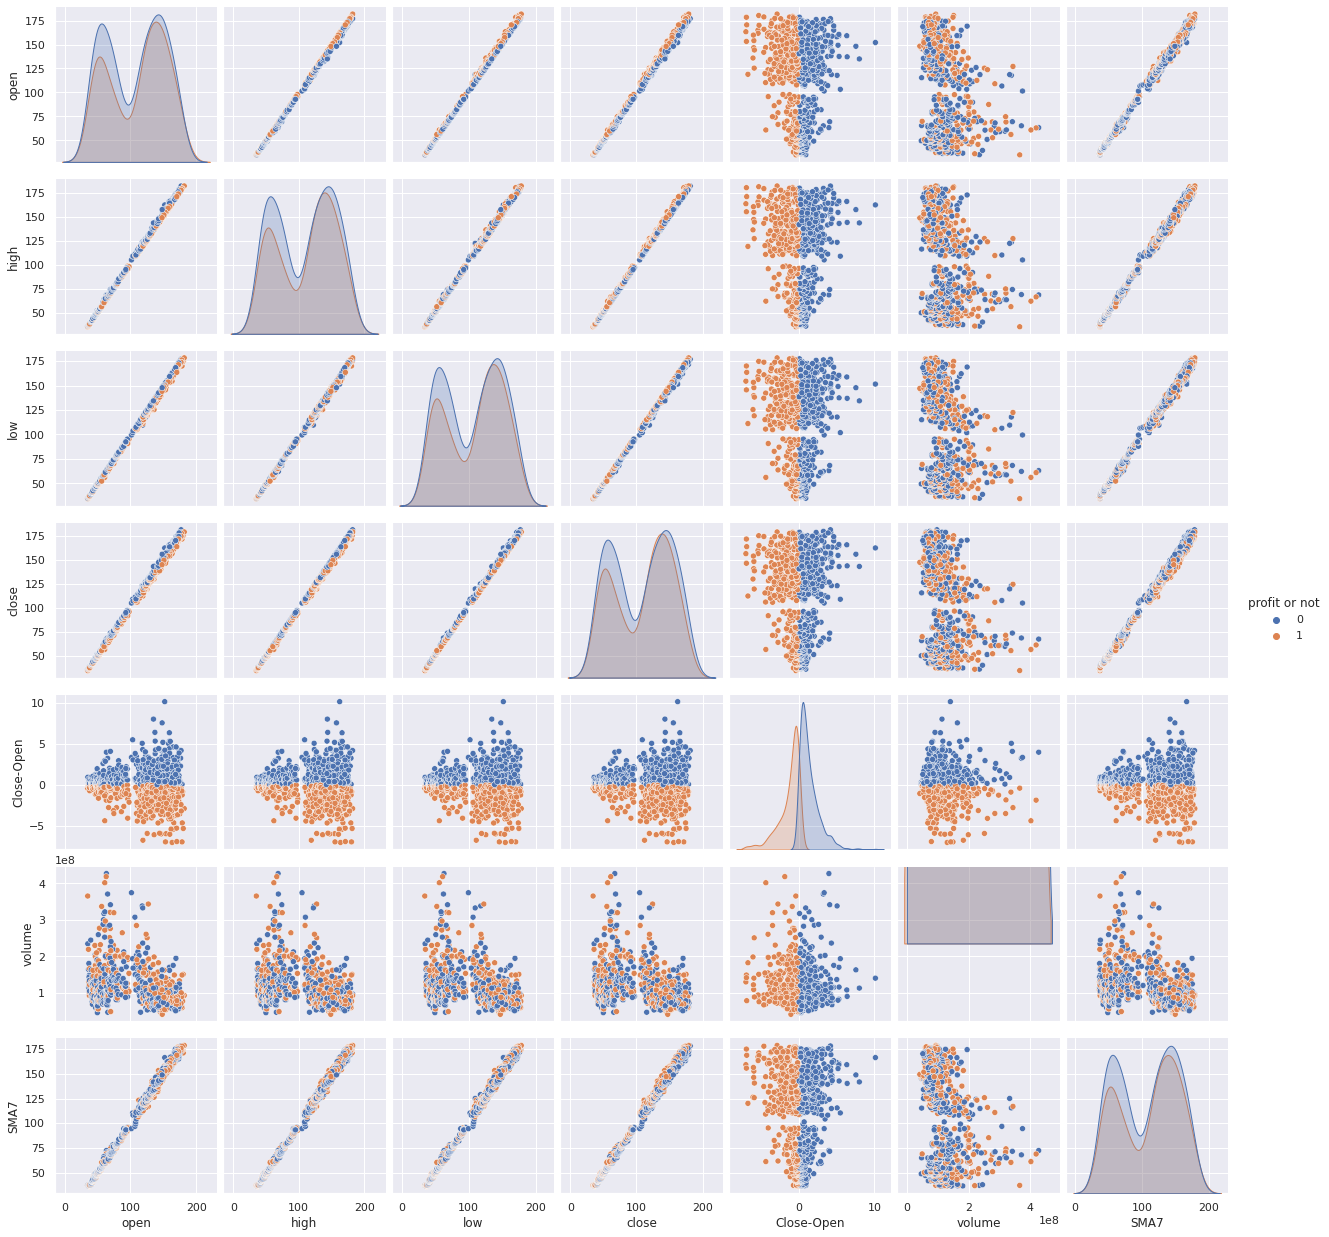

In [ ]:
sns.pairplot(df, hue='profit or not')
plt.show()

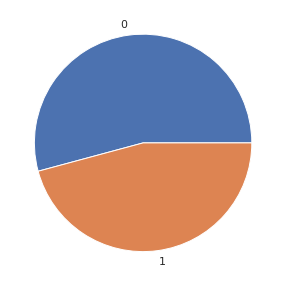

In [5]:
y =df['profit or not']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [6]:
X = df.drop(columns=['profit or not', 'date'])
X.head(10)

open     high      low    close  Close-Open     volume       SMA7
0  37.4340  38.3910  37.2745  38.1663      0.7323  148158948  37.383571
1  34.7972  35.2178  34.3187  34.3646     -0.4326  365248780  37.088714
2  34.9302  35.9017  34.7537  35.8316      0.9014  234428280  37.138086
3  35.9380  35.9694  35.2613  35.7519     -0.1861  219111056  36.819071
4  36.1458  36.6920  35.8945  36.4334      0.2876  164101256  36.632629
5  36.5639  37.3470  36.1627  37.0521      0.4882  180396324  36.531814
6  36.8564  37.2116  36.4600  37.1705      0.3141  143122680  36.395771
7  36.9482  37.1464  36.6171  36.8056     -0.1426  108092964  36.201386
8  36.4576  36.5591  36.0636  36.2521     -0.2055  129756744  36.471029
9  36.3174  37.0714  36.2642  36.9941      0.6767  114841296  36.637100

In [7]:
X.describe().transpose()

count          mean           std           min           25%  \
open        965.0  1.082633e+02  4.391663e+01  3.479720e+01  6.444900e+01   
high        965.0  1.096058e+02  4.445724e+01  3.521780e+01  6.520210e+01   
low         965.0  1.070133e+02  4.335585e+01  3.431870e+01  6.399020e+01   
close       965.0  1.083732e+02  4.391775e+01  3.436460e+01  6.454500e+01   
Close-Open  965.0  1.098417e-01  1.923871e+00 -7.059900e+00 -6.723000e-01   
volume      965.0  1.129207e+08  5.359624e+07  4.084055e+07  7.809394e+07   
SMA7        965.0  1.080225e+02  4.396521e+01  3.620139e+01  6.479240e+01   

                     50%           75%           max  
open        1.198738e+02  1.459425e+02  1.818779e+02  
high        1.218266e+02  1.477645e+02  1.821866e+02  
low         1.182233e+02  1.447986e+02  1.783824e+02  
close       1.199729e+02  1.461000e+02  1.812605e+02  
Close-Open  1.279000e-01  1.039300e+00  1.013100e+01  
volume      9.839056e+07  1.297725e+08  4.268849e+08  
SMA7        1.201315e+02  1.456985e+02  1.787580e+02

**Standardize the Data**

In [8]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

open      high       low     close  Close-Open    volume      SMA7
0 -1.613650 -1.602701 -1.609355 -1.599428    0.323712  0.657816 -1.607533
1 -1.673722 -1.674115 -1.677566 -1.686037   -0.282099  4.710384 -1.614243
2 -1.670692 -1.658724 -1.667528 -1.652617    0.411654  2.268266 -1.613119
3 -1.647732 -1.657200 -1.655814 -1.654432   -0.153906  1.982329 -1.620379
4 -1.642998 -1.640938 -1.641202 -1.638907    0.092444  0.955423 -1.624622
5 -1.633473 -1.626197 -1.635012 -1.624812    0.196767  1.259614 -1.626916
6 -1.626809 -1.629244 -1.628152 -1.622114    0.106226  0.563801 -1.630012
7 -1.624718 -1.630711 -1.624526 -1.630427   -0.131283 -0.090123 -1.634436
8 -1.635895 -1.643929 -1.637299 -1.643037   -0.163995  0.314289 -1.628300
9 -1.639089 -1.632399 -1.632670 -1.626133    0.294797  0.035852 -1.624520

In [9]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
open        965.0 -5.890510e-17  1.000519 -1.673722 -0.998188  0.264512   
high        965.0  3.534306e-16  1.000519 -1.674115 -0.999313  0.275032   
low         965.0 -5.890510e-17  1.000519 -1.677566 -0.992840  0.258692   
close       965.0  0.000000e+00  1.000519 -1.686037 -0.998478  0.264261   
Close-Open  965.0  1.656706e-17  1.000519 -3.728658 -0.406757  0.009391   
volume      965.0 -8.835765e-17  1.000519 -1.345571 -0.650136 -0.271245   
SMA7        965.0 -1.767153e-16  1.000519 -1.634436 -0.983789  0.275567   

                 75%       max  
open        0.858415  1.677103  
high        0.858770  1.633445  
low         0.871968  1.646978  
close       0.859479  1.660493  
Close-Open  0.483369  5.211551  
volume      0.314583  5.860989  
SMA7        0.857395  1.609732

**Observations and variables**

In [10]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

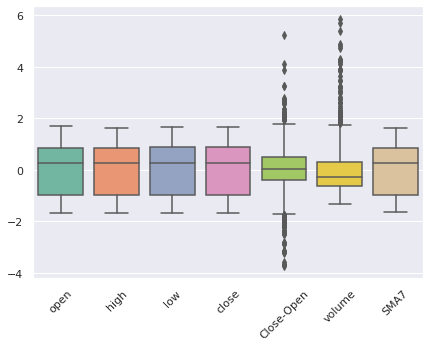

In [11]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

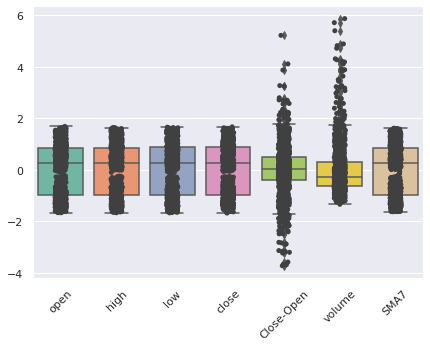

In [12]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

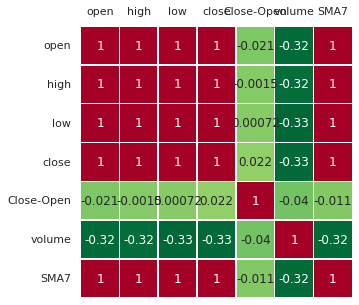

In [13]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

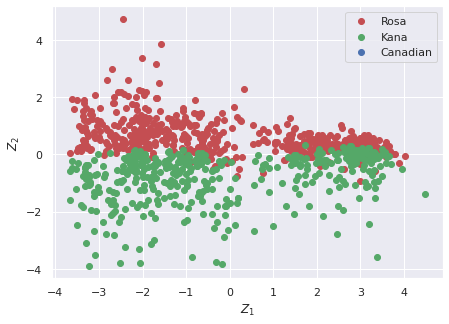

In [14]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

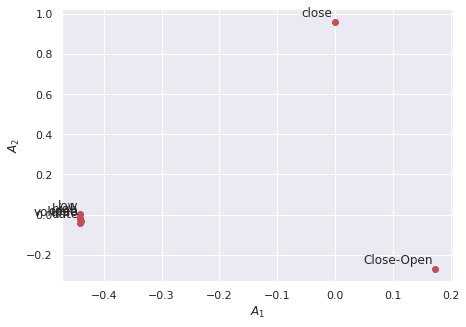

In [15]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


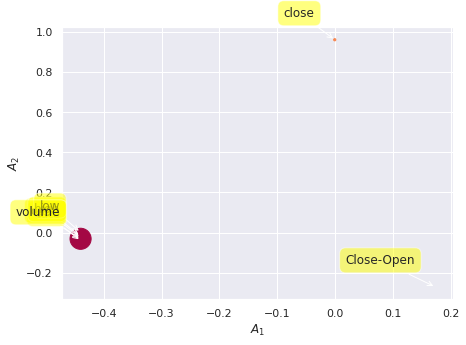

In [16]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

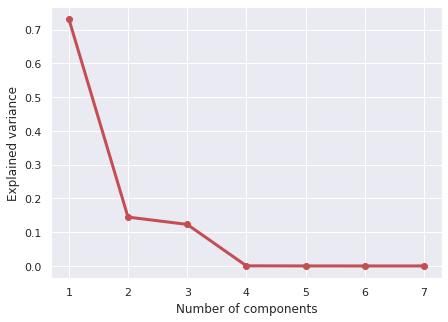

In [17]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

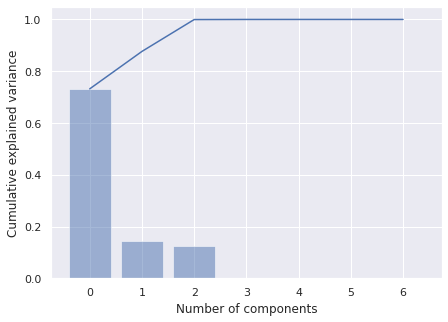

In [18]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

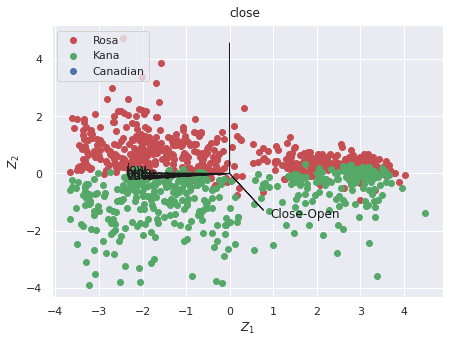

In [19]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [20]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=58f080ee45a63646dae3374282dfb6e164ca46604e41b75efee008295148785c
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=c32eac213c0a186c770b3c11d9dcbc3b2e7b0efed01ba1413e6d3622d8a26aa4
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [21]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [22]:
out['PC']

PC1       PC2       PC3
0    3.651790  0.306031  0.114692
1    4.482651 -1.367741  3.763577
2    4.031831 -0.040763  1.646772
3    3.970675 -0.507765  1.222344
4    3.772140  0.006248  0.321236
..        ...       ...       ...
960 -2.084393  1.171749 -0.020522
961 -2.225518  1.167990 -0.035328
962 -2.148905 -0.833602 -0.341516
963 -1.940606 -1.760714 -0.243042
964 -2.016036  3.358469  2.314072

[965 rows x 3 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [965] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [965] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f537af316d0>)

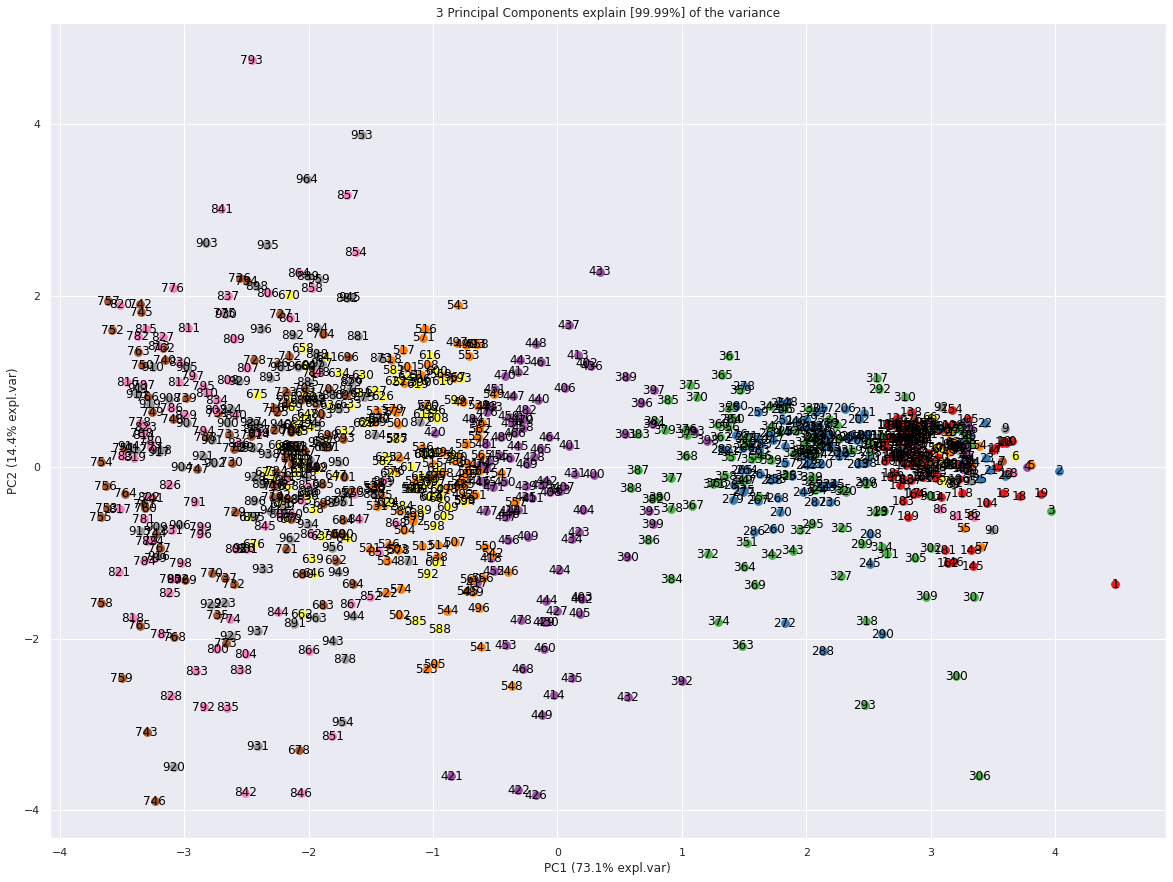

In [23]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [24]:
A = out['loadings'].T

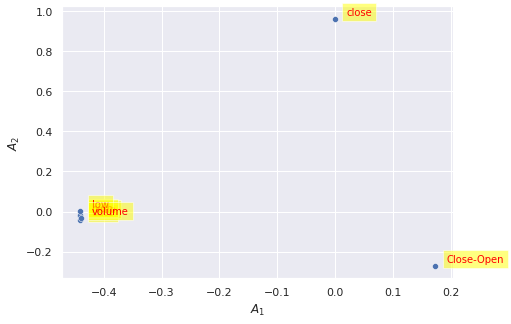

In [25]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

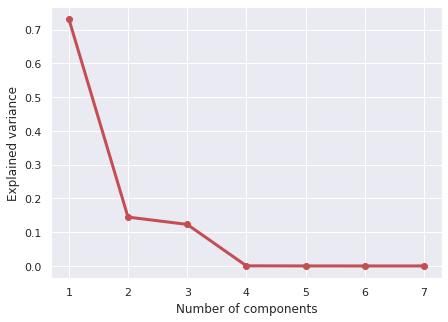

In [26]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

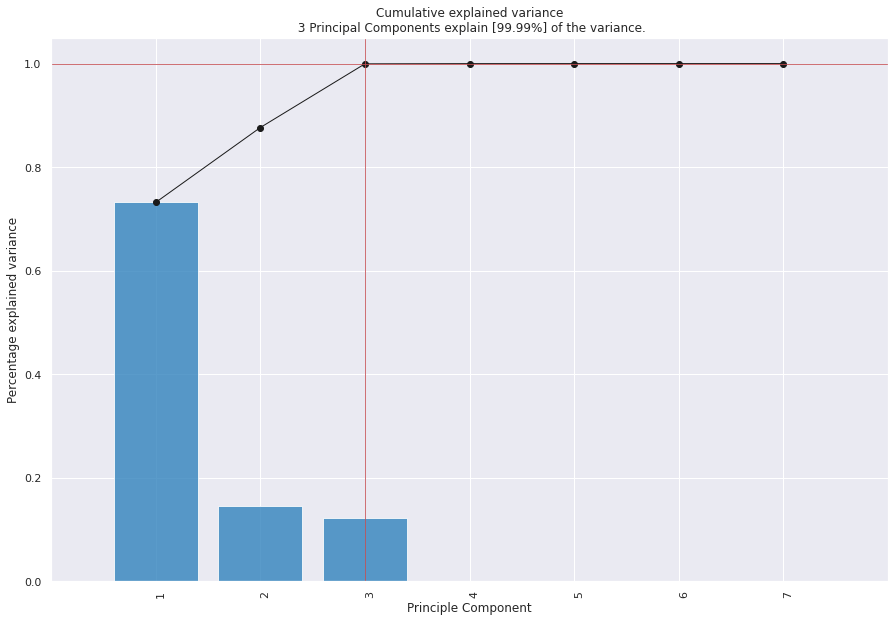

<Figure size 504x360 with 0 Axes>

In [27]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [965] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [965] unique colors! Available unique colors: [9].


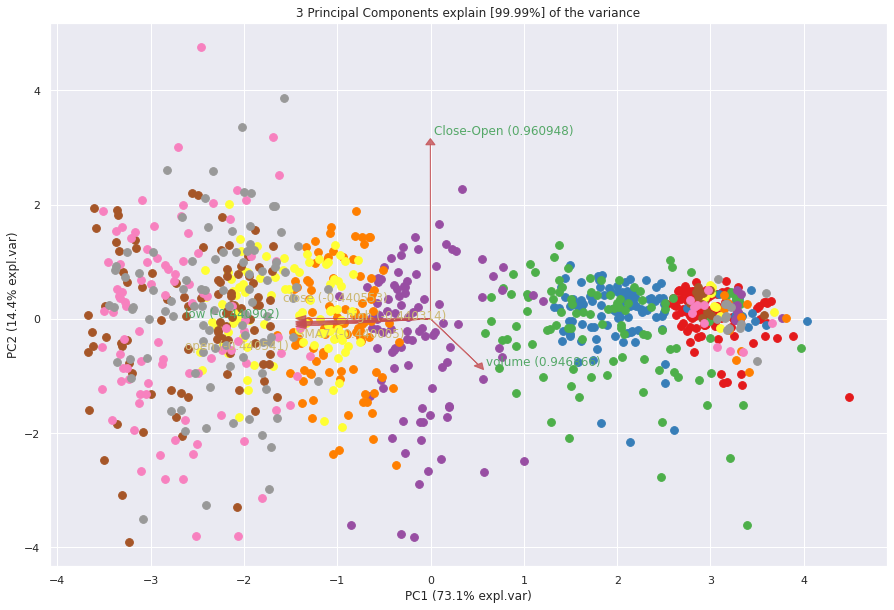

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5379f75100>)

In [28]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [965] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [965] unique colors! Available unique colors: [9].


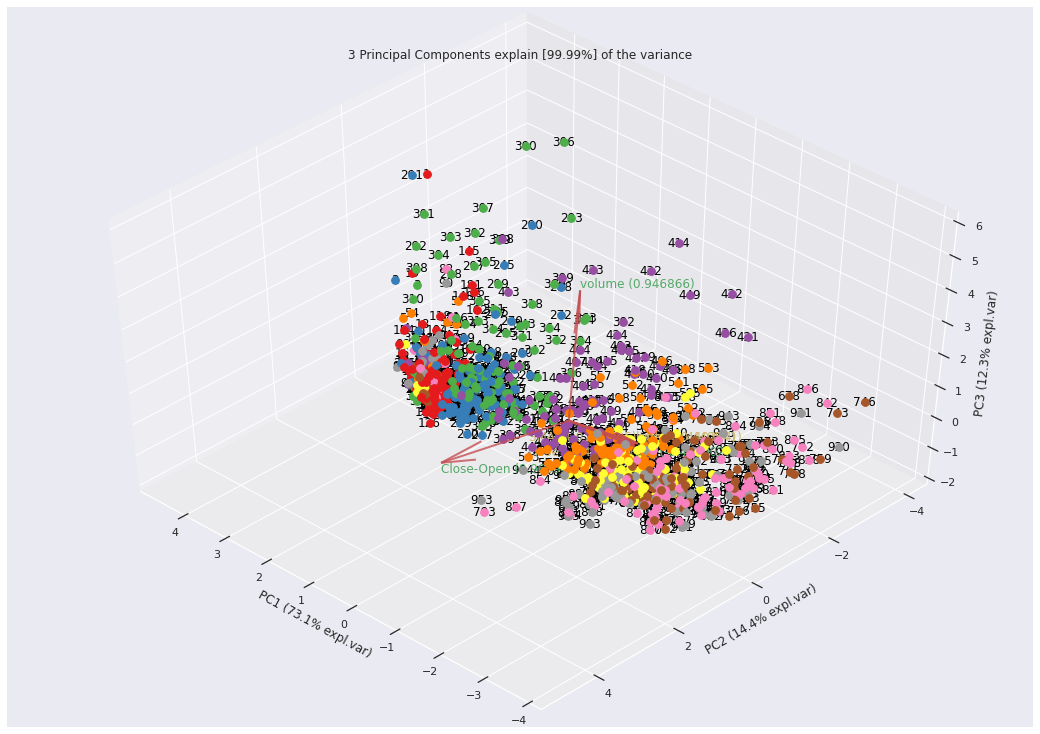

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f5377c06d60>)

In [29]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [30]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [31]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (868, 9)
Unseen Data For Predictions: (97, 9)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [32]:
from pycaret.classification import *
clf = setup(data=data, target='profit or not', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target     profit or not
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (868, 9)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set        (607, 609)
12                    Transformed Test Set        (261, 609)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              dece
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='profit or not',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [33]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
dt            Decision Tree Classifier    0.9967  0.9967  0.9966  0.9967   
rf            Random Forest Classifier    0.9967  1.0000  0.9966  0.9967   
ada               Ada Boost Classifier    0.9967  0.9967  0.9966  0.9967   
gbc       Gradient Boosting Classifier    0.9967  0.9965  0.9966  0.9967   
et              Extra Trees Classifier    0.9917  1.0000  0.9825  1.0000   
lda       Linear Discriminant Analysis    0.8731  1.0000  0.7304  1.0000   
qda    Quadratic Discriminant Analysis    0.7269  0.7337  0.8411  0.7030   
knn             K Neighbors Classifier    0.5520  0.5655  0.5108  0.5209   
lr                 Logistic Regression    0.5289  0.4966  0.0000  0.0000   
dummy                 Dummy Classifier    0.5289  0.5000  0.0000  0.0000   
ridge                 Ridge Classifier    0.5272  0.0000  0.2340  0.3670   
nb                         Naive Bayes    0.5222  0.5011  0.0036  0.0200   
svm                SVM - Linear Kernel    0.5057  0.0000  0.4000  0.1884   

           F1   Kappa     MCC  TT (Sec)  
dt     0.9966  0.9934  0.9935     0.035  
rf     0.9966  0.9934  0.9935     0.282  
ada    0.9966  0.9934  0.9935     0.038  
gbc    0.9966  0.9934  0.9935     0.271  
et     0.9910  0.9834  0.9838     0.477  
lda    0.8410  0.7409  0.7687     0.174  
qda    0.7488  0.4626  0.4930     0.092  
knn    0.5136  0.0993  0.0995     0.069  
lr     0.0000  0.0000  0.0000     0.352  
dummy  0.0000  0.0000  0.0000     0.027  
ridge  0.2528  0.0221  0.0207     0.065  
nb     0.0061 -0.0127 -0.0284     0.037  
svm    0.2562  0.0000  0.0000     0.066

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


In [34]:
best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [35]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9836  0.9844  1.0000  0.9667  0.9831  0.9672  0.9677
6       0.9836  0.9828  0.9655  1.0000  0.9825  0.9671  0.9676
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9967  0.9967  0.9966  0.9967  0.9966  0.9934  0.9935
SD      0.0066  0.0066  0.0103  0.0100  0.0069  0.0131  0.0129

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [36]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [37]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9836  0.9844  1.0000  0.9667  0.9831  0.9672  0.9677
6       0.9836  0.9828  0.9655  1.0000  0.9825  0.9671  0.9676
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9967  0.9967  0.9966  0.9967  0.9966  0.9934  0.9935
SD      0.0066  0.0066  0.0103  0.0100  0.0069  0.0131  0.0129

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [38]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [39]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [40]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [41]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5082  0.5373  0.3929  0.4583  0.4231 -0.0011 -0.0011
1       0.5574  0.5609  0.6552  0.5278  0.5846  0.1225  0.1258
2       0.4754  0.5124  0.3793  0.4400  0.4074 -0.0586 -0.0591
3       0.5902  0.6385  0.5172  0.5769  0.5455  0.1743  0.1752
4       0.5902  0.5603  0.5517  0.5714  0.5614  0.1770  0.1771
5       0.6393  0.6471  0.5862  0.6296  0.6071  0.2746  0.2752
6       0.4098  0.3912  0.2759  0.3478  0.3077 -0.1948 -0.1988
7       0.6167  0.6289  0.6071  0.5862  0.5965  0.2316  0.2318
8       0.5500  0.5887  0.6071  0.5152  0.5574  0.1060  0.1074
9       0.5833  0.5898  0.5357  0.5556  0.5455  0.1611  0.1612
Mean    0.5520  0.5655  0.5108  0.5209  0.5136  0.0993  0.0995
SD      0.0661  0.0715  0.1157  0.0797  0.0942  0.1363  0.1374

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [84]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9836  0.9995  0.9643  1.0000  0.9818  0.9669  0.9674
1       0.9672  0.9978  0.9310  1.0000  0.9643  0.9341  0.9361
2       0.9836  0.9995  0.9655  1.0000  0.9825  0.9671  0.9676
3       0.9672  0.9989  0.9310  1.0000  0.9643  0.9341  0.9361
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9672  0.9828  0.9655  0.9655  0.9655  0.9343  0.9343
6       0.9836  0.9844  1.0000  0.9667  0.9831  0.9672  0.9677
7       0.9500  0.9648  0.9286  0.9630  0.9455  0.8993  0.8998
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9833  1.0000  0.9643  1.0000  0.9818  0.9664  0.9670
Mean    0.9786  0.9928  0.9650  0.9895  0.9769  0.9569  0.9576
SD      0.0149  0.0112  0.0270  0.0160  0.0162  0.0300  0.0296

INFO:logs:create_model_container: 36
INFO:logs:master_model_container: 36
INFO:logs:display_container: 11
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [85]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [86]:
knn = create_model('svm')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9508  0.0  0.8966  1.0000  0.9455  0.9009  0.9054
2       0.9836  0.0  1.0000  0.9667  0.9831  0.9672  0.9677
3       0.9344  0.0  0.8621  1.0000  0.9259  0.8677  0.8754
4       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9672  0.0  1.0000  0.9355  0.9667  0.9345  0.9365
6       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9833  0.0  0.9643  1.0000  0.9818  0.9664  0.9670
8       0.9833  0.0  1.0000  0.9655  0.9825  0.9666  0.9671
9       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9803  0.0  0.9723  0.9868  0.9785  0.9603  0.9619
SD      0.0217  0.0  0.0483  0.0217  0.0243  0.0438  0.0415

INFO:logs:create_model_container: 37
INFO:logs:master_model_container: 37
INFO:logs:display_container: 12
INFO:logs:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [88]:
tuned_svm = tune_model(svm)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
1       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
2       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
3       0.9836  0.0     1.0  0.9667  0.9831  0.9672  0.9677
4       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
5       0.9672  0.0     1.0  0.9355  0.9667  0.9345  0.9365
6       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
7       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
8       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
9       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
Mean    0.9951  0.0     1.0  0.9902  0.9950  0.9902  0.9904
SD      0.0105  0.0     0.0  0.0208  0.0107  0.0210  0.0204

INFO:logs:create_model_container: 39
INFO:logs:master_model_container: 39
INFO:logs:display_container: 14
INFO:logs:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.5000000001, learning_rate='invscaling', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [89]:
evaluate_model(tuned_svm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.5000000001, learning_rate='invscaling', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [44]:
lr = create_model('lr')

Accuracy     AUC  Recall  Prec.   F1  Kappa  MCC
0       0.5410  0.4675     0.0    0.0  0.0    0.0  0.0
1       0.5246  0.4784     0.0    0.0  0.0    0.0  0.0
2       0.5246  0.5280     0.0    0.0  0.0    0.0  0.0
3       0.5246  0.5496     0.0    0.0  0.0    0.0  0.0
4       0.5246  0.4310     0.0    0.0  0.0    0.0  0.0
5       0.5246  0.4795     0.0    0.0  0.0    0.0  0.0
6       0.5246  0.5517     0.0    0.0  0.0    0.0  0.0
7       0.5333  0.4554     0.0    0.0  0.0    0.0  0.0
8       0.5333  0.5469     0.0    0.0  0.0    0.0  0.0
9       0.5333  0.4777     0.0    0.0  0.0    0.0  0.0
Mean    0.5289  0.4966     0.0    0.0  0.0    0.0  0.0
SD      0.0056  0.0415     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [45]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall  Prec.   F1  Kappa  MCC
0       0.5410  0.4675     0.0    0.0  0.0    0.0  0.0
1       0.5246  0.4784     0.0    0.0  0.0    0.0  0.0
2       0.5246  0.5280     0.0    0.0  0.0    0.0  0.0
3       0.5246  0.5496     0.0    0.0  0.0    0.0  0.0
4       0.5246  0.4310     0.0    0.0  0.0    0.0  0.0
5       0.5246  0.4795     0.0    0.0  0.0    0.0  0.0
6       0.5246  0.5517     0.0    0.0  0.0    0.0  0.0
7       0.5333  0.4554     0.0    0.0  0.0    0.0  0.0
8       0.5333  0.5469     0.0    0.0  0.0    0.0  0.0
9       0.5333  0.4777     0.0    0.0  0.0    0.0  0.0
Mean    0.5289  0.4966     0.0    0.0  0.0    0.0  0.0
SD      0.0056  0.0415     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [46]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [47]:
rf = create_model('rf')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9836  1.0  1.0000  0.9667  0.9831  0.9672  0.9677
6       0.9836  1.0  0.9655  1.0000  0.9825  0.9671  0.9676
7       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9967  1.0  0.9966  0.9967  0.9966  0.9934  0.9935
SD      0.0066  0.0  0.0103  0.0100  0.0069  0.0131  0.0129

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [48]:
tuned_rf = tune_model(rf)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9836  1.0  1.0000  0.9667  0.9831  0.9672  0.9677
6       0.9836  1.0  0.9655  1.0000  0.9825  0.9671  0.9676
7       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9967  1.0  0.9966  0.9967  0.9966  0.9934  0.9935
SD      0.0066  0.0  0.0103  0.0100  0.0069  0.0131  0.0129

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [49]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [78]:
tuned_svm = tune_model(svm)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
1       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
2       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
3       0.9836  0.0     1.0  0.9667  0.9831  0.9672  0.9677
4       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
5       0.9672  0.0     1.0  0.9355  0.9667  0.9345  0.9365
6       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
7       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
8       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
9       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
Mean    0.9951  0.0     1.0  0.9902  0.9950  0.9902  0.9904
SD      0.0105  0.0     0.0  0.0208  0.0107  0.0210  0.0204

INFO:logs:create_model_container: 34
INFO:logs:master_model_container: 34
INFO:logs:display_container: 9
INFO:logs:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.5000000001, learning_rate='invscaling', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [80]:
evaluate_model(tuned_svm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.5000000001, learning_rate='invscaling', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [50]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9836  0.9844  1.0000  0.9667  0.9831  0.9672  0.9677
6       0.9836  0.9828  0.9655  1.0000  0.9825  0.9671  0.9676
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9967  0.9967  0.9966  0.9967  0.9966  0.9934  0.9935
SD      0.0066  0.0066  0.0103  0.0100  0.0069  0.0131  0.0129

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 11
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [51]:
tuned_best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [52]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [53]:
clf_pca = setup(data=data, target='profit or not', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target     profit or not
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (868, 9)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (607, 3)
12                    Transformed Test Set          (261, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              4698
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='profit or not',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('dummy', Dummify(target='profit or not')),
                ('fix_perfect', Remove_100(target='profit or not')),
     

In [61]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.9934  1.0000  0.9966  0.9902   
svm                   SVM - Linear Kernel    0.9803  0.0000  0.9723  0.9868   
knn                K Neighbors Classifier    0.9703  0.9975  0.9789  0.9609   
lightgbm  Light Gradient Boosting Machine    0.9670  0.9973  0.9578  0.9718   
ridge                    Ridge Classifier    0.9604  0.0000  0.9196  0.9964   
qda       Quadratic Discriminant Analysis    0.9588  0.9939  0.9230  0.9891   
gbc          Gradient Boosting Classifier    0.9588  0.9929  0.9612  0.9536   
lda          Linear Discriminant Analysis    0.9588  0.9953  0.9196  0.9924   
ada                  Ada Boost Classifier    0.9571  0.9883  0.9507  0.9591   
et                 Extra Trees Classifier    0.9571  0.9933  0.9473  0.9621   
rf               Random Forest Classifier    0.9555  0.9924  0.9615  0.9475   
nb                            Naive Bayes    0.9456  0.9952  0.8951  0.9887   
dt               Decision Tree Classifier    0.9358  0.9350  0.9230  0.9411   
dummy                    Dummy Classifier    0.5289  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
lr        0.9932  0.9869  0.9872     0.018  
svm       0.9785  0.9603  0.9619     0.012  
knn       0.9692  0.9406  0.9420     0.023  
lightgbm  0.9643  0.9336  0.9344     0.052  
ridge     0.9555  0.9201  0.9238     0.013  
qda       0.9542  0.9169  0.9198     0.012  
gbc       0.9566  0.9173  0.9187     0.103  
lda       0.9540  0.9169  0.9199     0.013  
ada       0.9541  0.9139  0.9153     0.098  
et        0.9539  0.9138  0.9151     0.189  
rf        0.9534  0.9107  0.9127     0.223  
nb        0.9382  0.8901  0.8953     0.012  
dt        0.9316  0.8711  0.8718     0.013  
dummy     0.0000  0.0000  0.0000     0.012

INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [81]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9836  0.9989  0.9655  1.0000  0.9825  0.9671  0.9676
2       0.9672  0.9968  1.0000  0.9355  0.9667  0.9345  0.9365
3       0.9508  0.9935  0.9310  0.9643  0.9474  0.9012  0.9017
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9672  0.9978  1.0000  0.9355  0.9667  0.9345  0.9365
6       0.9344  0.9962  1.0000  0.8788  0.9355  0.8694  0.8769
7       0.9500  0.9944  0.9643  0.9310  0.9474  0.8998  0.9003
8       0.9833  0.9994  0.9643  1.0000  0.9818  0.9664  0.9670
9       0.9667  0.9983  0.9643  0.9643  0.9643  0.9330  0.9330
Mean    0.9703  0.9975  0.9789  0.9609  0.9692  0.9406  0.9420
SD      0.0205  0.0022  0.0231  0.0388  0.0209  0.0410  0.0397

INFO:logs:create_model_container: 35
INFO:logs:master_model_container: 35
INFO:logs:display_container: 10
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune the Best Model**

In [63]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
3       0.9836  1.0     1.0  0.9667  0.9831  0.9672  0.9677
4       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
5       0.9672  1.0     1.0  0.9355  0.9667  0.9345  0.9365
6       0.9836  1.0     1.0  0.9667  0.9831  0.9672  0.9677
7       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
Mean    0.9934  1.0     1.0  0.9869  0.9933  0.9869  0.9872
SD      0.0109  0.0     0.0  0.0216  0.0111  0.0217  0.0212

INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [64]:
tuned_best_model_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [65]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [90]:
svm = create_model('svm')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9508  0.0  0.8966  1.0000  0.9455  0.9009  0.9054
2       0.9836  0.0  1.0000  0.9667  0.9831  0.9672  0.9677
3       0.9344  0.0  0.8621  1.0000  0.9259  0.8677  0.8754
4       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9672  0.0  1.0000  0.9355  0.9667  0.9345  0.9365
6       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9833  0.0  0.9643  1.0000  0.9818  0.9664  0.9670
8       0.9833  0.0  1.0000  0.9655  0.9825  0.9666  0.9671
9       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9803  0.0  0.9723  0.9868  0.9785  0.9603  0.9619
SD      0.0217  0.0  0.0483  0.0217  0.0243  0.0438  0.0415

INFO:logs:create_model_container: 40
INFO:logs:master_model_container: 40
INFO:logs:display_container: 15
INFO:logs:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [91]:
tuned_svm = tune_model(svm)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
1       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
2       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
3       0.9836  0.0     1.0  0.9667  0.9831  0.9672  0.9677
4       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
5       0.9672  0.0     1.0  0.9355  0.9667  0.9345  0.9365
6       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
7       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
8       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
9       1.0000  0.0     1.0  1.0000  1.0000  1.0000  1.0000
Mean    0.9951  0.0     1.0  0.9902  0.9950  0.9902  0.9904
SD      0.0105  0.0     0.0  0.0208  0.0107  0.0210  0.0204

INFO:logs:create_model_container: 41
INFO:logs:master_model_container: 41
INFO:logs:display_container: 16
INFO:logs:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.5000000001, learning_rate='invscaling', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [93]:
evaluate_model(tuned_svm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.5000000001, learning_rate='invscaling', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [94]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9836  0.9989  0.9655  1.0000  0.9825  0.9671  0.9676
2       0.9672  0.9968  1.0000  0.9355  0.9667  0.9345  0.9365
3       0.9508  0.9935  0.9310  0.9643  0.9474  0.9012  0.9017
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9672  0.9978  1.0000  0.9355  0.9667  0.9345  0.9365
6       0.9344  0.9962  1.0000  0.8788  0.9355  0.8694  0.8769
7       0.9500  0.9944  0.9643  0.9310  0.9474  0.8998  0.9003
8       0.9833  0.9994  0.9643  1.0000  0.9818  0.9664  0.9670
9       0.9667  0.9983  0.9643  0.9643  0.9643  0.9330  0.9330
Mean    0.9703  0.9975  0.9789  0.9609  0.9692  0.9406  0.9420
SD      0.0205  0.0022  0.0231  0.0388  0.0209  0.0410  0.0397

INFO:logs:create_model_container: 42
INFO:logs:master_model_container: 42
INFO:logs:display_container: 17
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [95]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9836  0.9995  0.9643  1.0000  0.9818  0.9669  0.9674
1       0.9672  0.9978  0.9310  1.0000  0.9643  0.9341  0.9361
2       0.9836  0.9995  0.9655  1.0000  0.9825  0.9671  0.9676
3       0.9672  0.9989  0.9310  1.0000  0.9643  0.9341  0.9361
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9672  0.9828  0.9655  0.9655  0.9655  0.9343  0.9343
6       0.9836  0.9844  1.0000  0.9667  0.9831  0.9672  0.9677
7       0.9500  0.9648  0.9286  0.9630  0.9455  0.8993  0.8998
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9833  1.0000  0.9643  1.0000  0.9818  0.9664  0.9670
Mean    0.9786  0.9928  0.9650  0.9895  0.9769  0.9569  0.9576
SD      0.0149  0.0112  0.0270  0.0160  0.0162  0.0300  0.0296

INFO:logs:create_model_container: 43
INFO:logs:master_model_container: 43
INFO:logs:display_container: 18
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [96]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [66]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
print("Numpy version: ", np.__version__)

Numpy version:  1.21.6


In [68]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 8.0 MB/s 
     |████████████████████████████████| 25.3 MB 10.7 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [69]:
import shap

In [70]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9836  0.9989  1.0000  0.9655  0.9825  0.9671  0.9676
1       0.9836  0.9962  0.9655  1.0000  0.9825  0.9671  0.9676
2       0.9180  0.9849  0.8966  0.9286  0.9123  0.8354  0.8359
3       0.9508  0.9930  0.9655  0.9333  0.9492  0.9016  0.9020
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8852  0.9774  0.9655  0.8235  0.8889  0.7718  0.7822
7       0.9167  0.9855  0.8571  0.9600  0.9057  0.8315  0.8357
8       0.9500  0.9905  0.9643  0.9310  0.9474  0.8998  0.9003
9       0.9667  0.9978  1.0000  0.9333  0.9655  0.9333  0.9354
Mean    0.9555  0.9924  0.9615  0.9475  0.9534  0.9107  0.9127
SD      0.0368  0.0073  0.0459  0.0501  0.0379  0.0737  0.0713

INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [71]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9344  0.9600  0.8929  0.9615  0.9259  0.8672  0.8692
1       0.9180  0.9461  0.9310  0.9000  0.9153  0.8359  0.8364
2       0.9016  0.9192  0.8966  0.8966  0.8966  0.8028  0.8028
3       0.9016  0.9240  0.8966  0.8966  0.8966  0.8028  0.8028
4       0.9344  0.9515  0.9310  0.9310  0.9310  0.8685  0.8685
5       0.9344  0.9914  0.9655  0.9032  0.9333  0.8690  0.8708
6       0.9016  0.9526  0.9655  0.8485  0.9032  0.8041  0.8110
7       0.9500  0.9609  0.9643  0.9310  0.9474  0.8998  0.9003
8       0.9500  0.9754  1.0000  0.9032  0.9492  0.9002  0.9047
9       0.9500  0.9637  0.9286  0.9630  0.9455  0.8993  0.8998
Mean    0.9276  0.9545  0.9372  0.9135  0.9244  0.8550  0.8566
SD      0.0194  0.0205  0.0342  0.0325  0.0195  0.0387  0.0386

INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 7
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


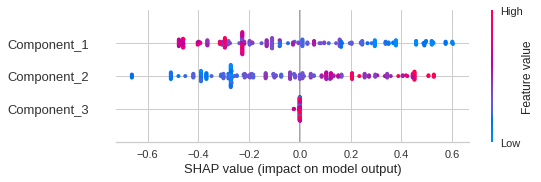

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [72]:
interpret_model(tuned_rf_pca, plot='summary')

In [73]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [74]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [75]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
